# Using Holocene Warming as an Analog for Impacts of Future Warming on the Greenland Ice Sheet and Coastal Communities

Caitlin Locke <br />
Terrestrial Paleoclimate Final Project <br />
Fall 2022 <br />

Team Members: Sam Chester, Emily Glazer, Jaewon Lee, Lauren Lewright  <br />

## Background

Future projections of sea level are important for understanding how vulnerable coastal communities will be affected worldwide. In this project, we evaluated the impact of climate change on coastal communities by using the Holocene Thermal Maximum (HTM) as an analog for future warming, as predicted by Climate Model Intercomparison Project Phase 6 (CMIP6). We examined changes in sea level worldwide due to Greenland Ice Sheet (GrIS) thickness changes through the Holocene using Jacky Austermann’s sea level model and examined our model outputs, along with National Oceanic and Atmospheric Administration (NOAA) tide gauge data.

## 1) Import python libraries and packages.
Import Numpy, Pandas, Matplotlib, Xarray, and Cartopy python libraries and packages. Set the default figure size to (12, 6).

In [1]:
# import Python packages and libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (12,6) # set the default figure size

## 2) Load data from NOAA Tides and Currents website
This dataset contains local relative sea level (RSL) trends based on monthly mean sea level data collected by tide gauges. The tide gauge data for this project are from the National Water Level Observation Network (NWLON), which is a permanent network of water level monitoring stations throughout the United States maintained by NOAA.

In [2]:
# Load data from NOAA Tides and Currents website for The Battery, NY (https://tidesandcurrents.noaa.gov/sltrends/sltrends_station.shtml?id=8518750)
url = 'https://tidesandcurrents.noaa.gov/sltrends/data/8518750_meantrend.csv'
df = pd.read_csv(url)
df.head()

# # load data from local file
# file_path = '8518750_meantrend.csv'
# df = pd.read_csv(file_path)
# df.head()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
1856,1,-0.250,-0.391,-0.383,-0.400,NaN
1856,2,-0.247,-0.391,-0.383,-0.400,NaN
1856,3,-0.346,-0.391,-0.382,-0.399,NaN
1856,4,-0.355,-0.391,-0.382,-0.399,NaN
1856,5,-0.324,-0.390,-0.382,-0.399,NaN


# 3) Clean NOAA Tide Data
1. Add DataFrame index
1. Rename column names and drop columns that aren't needed.
1. Change the DataFrame index to Year

In [3]:
# Add dataframe index
df = df.reset_index()
df.head()

,index,Year,Month,Monthly_MSL,Linear_Trend,High_Conf.,Low_Conf.
0,1856,1,-0.250,-0.391,-0.383,-0.400,NaN
1,1856,2,-0.247,-0.391,-0.383,-0.400,NaN
2,1856,3,-0.346,-0.391,-0.382,-0.399,NaN
3,1856,4,-0.355,-0.391,-0.382,-0.399,NaN
4,1856,5,-0.324,-0.390,-0.382,-0.399,NaN


In [4]:
# Display dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1817 non-null   int64  
 1   Year           1817 non-null   int64  
 2    Month         1817 non-null   float64
 3    Monthly_MSL   1817 non-null   float64
 4    Linear_Trend  1817 non-null   float64
 5    High_Conf.    1817 non-null   float64
 6    Low_Conf.     0 non-null      float64
dtypes: float64(5), int64(2)
memory usage: 99.5 KB


In [5]:
# Display dataframe columns
df.columns

Index(['index', 'Year', ' Month', ' Monthly_MSL', ' Linear_Trend',
       ' High_Conf.', ' Low_Conf.'],
      dtype='object')

In [6]:
# Rename column names to shift them to the correct header position
df.rename(columns={'index':'Year',
                       'Year':'Month',
                       ' Month':'Monthly_MSL',
                       ' Monthly_MSL':'Linear_Trend',
                        ' Linear_Trend':'High_Conf',
                        ' High_Conf.':'Low_Conf',
                        ' Low_Conf.':'DELETE'},
               inplace=True)
df.head()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf,Low_Conf,DELETE
0,1856,1,-0.250,-0.391,-0.383,-0.400,NaN
1,1856,2,-0.247,-0.391,-0.383,-0.400,NaN
2,1856,3,-0.346,-0.391,-0.382,-0.399,NaN
3,1856,4,-0.355,-0.391,-0.382,-0.399,NaN
4,1856,5,-0.324,-0.390,-0.382,-0.399,NaN


In [7]:
# Drop columns that aren't needed for analysis
df = df.drop(['DELETE'], axis = 1)
df.head()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf,Low_Conf
0,1856,1,-0.250,-0.391,-0.383,-0.400
1,1856,2,-0.247,-0.391,-0.383,-0.400
2,1856,3,-0.346,-0.391,-0.382,-0.399
3,1856,4,-0.355,-0.391,-0.382,-0.399
4,1856,5,-0.324,-0.390,-0.382,-0.399


In [8]:
# Display dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          1817 non-null   int64  
 1   Month         1817 non-null   int64  
 2   Monthly_MSL   1817 non-null   float64
 3   Linear_Trend  1817 non-null   float64
 4   High_Conf     1817 non-null   float64
 5   Low_Conf      1817 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 85.3 KB


In [9]:
# Make Year the index
df_yr = df.set_index(['Year'])
df_yr.tail()

,Month,Monthly_MSL,Linear_Trend,High_Conf,Low_Conf
Year,,,,,
2022,6,0.139,0.090,0.097,0.082
2022,7,0.101,0.090,0.098,0.082
2022,8,0.114,0.090,0.098,0.082
2022,9,0.142,0.090,0.098,0.083
2022,10,0.182,0.091,0.098,0.083


## 4) Plot monthly mean sea level by year for The Battery, New York

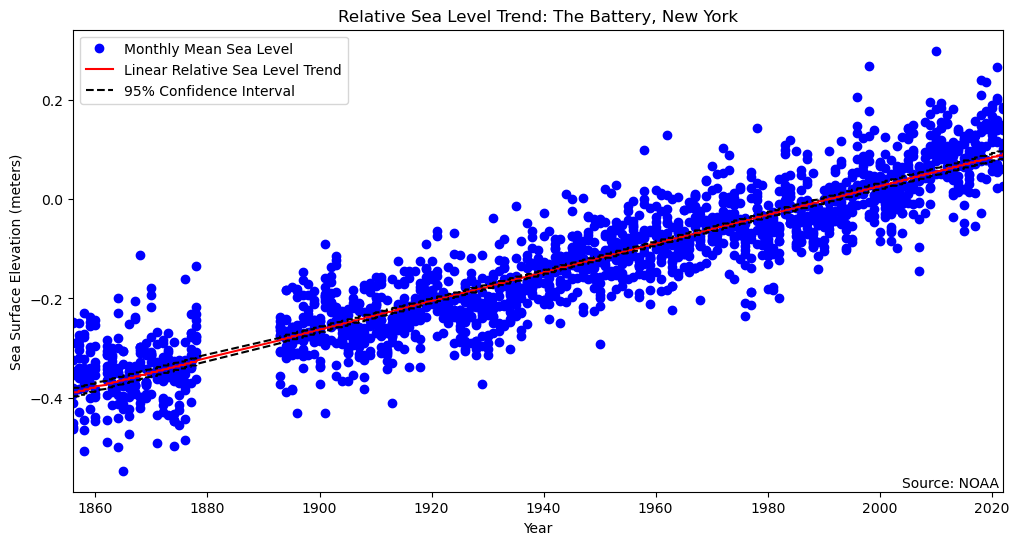

In [10]:
# Plot monthly mean sea level by year
fig, ax = plt.subplots()

df_yr.Monthly_MSL.plot(color='blue', style='o', ax=ax, label='Monthly Mean Sea Level');
df_yr.Linear_Trend.plot(color='red', ax=ax, label='Linear Relative Sea Level Trend');
df_yr.High_Conf.plot(color='black', style='--', ax=ax, label='95% Confidence Interval');
df_yr.Low_Conf.plot(color='black', style='--', ax=ax, label='');
plt.text(2004,-0.58,'Source: NOAA')

ax.set_ylabel('Sea Surface Elevation (meters)')
ax.set_title('Relative Sea Level Trend: The Battery, New York')
ax.margins(x=0)
ax.legend(loc=2);

The relative sea level trend is 2.89 millimeters/year with a 95% confidence
interval of +/- 0.09 mm/yr based on monthly mean sea level data from
1856 to 2021 which is equivalent to a change of 0.95 feet in 100 years. Source: NOAA

## 5) Save figure of monthly mean sea level by year for The Battery, New York

In [11]:
# Save figure
fig.savefig("RSL_Battery_NYC.png", bbox_inches='tight', dpi=600)

## 6) Make a subset DataFrame for 2022

In [12]:
# Make a subset dataframe for 2022
df_2022 = df[df_yr.index == 2022]
df_2022

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf,Low_Conf
1807,2022,1,0.149,0.088,0.096,0.081
1808,2022,2,0.026,0.089,0.096,0.081
1809,2022,3,0.061,0.089,0.097,0.081
1810,2022,4,0.087,0.089,0.097,0.081
1811,2022,5,0.185,0.089,0.097,0.082
1812,2022,6,0.139,0.090,0.097,0.082
1813,2022,7,0.101,0.090,0.098,0.082
1814,2022,8,0.114,0.090,0.098,0.082
1815,2022,9,0.142,0.090,0.098,0.083
1816,2022,10,0.182,0.091,0.098,0.083


In [13]:
# Get statistics for 2022 dataframe
df_2022.describe()

,Year,Month,Monthly_MSL,Linear_Trend,High_Conf,Low_Conf
count,10.0,10.00000,10.000000,10.00000,10.000000,10.000000
mean,2022.0,5.50000,0.118600,0.08950,0.097200,0.081800
std,0.0,3.02765,0.051141,0.00085,0.000789,0.000789
min,2022.0,1.00000,0.026000,0.08800,0.096000,0.081000
25%,2022.0,3.25000,0.090500,0.08900,0.097000,0.081000
50%,2022.0,5.50000,0.126500,0.08950,0.097000,0.082000
75%,2022.0,7.75000,0.147250,0.09000,0.098000,0.082000
max,2022.0,10.00000,0.185000,0.09100,0.098000,0.083000


## 7) Compute montly mean sea level in 2022 in meters and millimeters from subset 2022 DataFrame

In [14]:
# Montly mean sea level in 2022 in meters
msl2022_m = df_2022.Monthly_MSL.mean()
msl2022_m

0.1186

In [15]:
# Montly mean sea level in 2022 in millimeters
msl2022_mm = msl2022_m * 1000
msl2022_mm 

118.6

## 8) Calculate sea level change rates for each temperature scenario in millimeters and meters

In [16]:
# Calculate sea level change rates for 85 year difference (2015-2100) in millimeters

# 9.71 K (1)
SLC_NY_1_mm = 0.7767/85*1000
SLC_Nome_1_mm = 1.7740/85*1000
SLC_Yakutat_1_mm = 1.5582/85*1000
print(SLC_NY_1_mm)

# 13.91 K (2)
SLC_NY_2_mm = 0.8325/85*1000
SLC_Nome_2_mm = 1.8330/85*1000
SLC_Yakutat_1_mm = 1.6141/85*1000
print(SLC_NY_2_mm)

# 6.33 K (3)
SLC_NY_3_mm = 0.7279/85*1000
SLC_Nome_3_mm = 1.6649/85*1000
SLC_Yakutat_1_mm = 1.4638/85*1000
print(SLC_NY_3_mm)

9.137647058823529
9.794117647058822
8.563529411764707


## Calculated Sea Level Change Rates from Greenland Ice Sheet (GrIS) melt, 2022-2100, in different CMIP6 Temperature Projections
For the mean, 95th percentile, and 5th percentile projected temperature changes, a time window from the Holocene is determined that has a similar temperature increase to each CMIP6 projection. The magnitude of the sea level change was calculated for each of these time windows in our locations of interest, and a rate of sea level rise was computed for each temperature scenario by dividing the magnitude for each temperature scenario by 85 years (the time period used in the CMIP6 projections).

| CMIP6 SSP5-8.5 | Corresponding Holocene time interval | New York, NY | Nome, AK |
| --- | --- | --- | --- |
| Mean of projected warming, 9.71 K | 11.5 - 8 ka | 9.14 mm/yr | 20.87 mm/yr |
| 95th percentile of projected warming, 13.91 K | 12 - 7.5 ka | 9.79 mm/yr | 21.56 mm/yr |
| 5th percentile of projected warming, 6.33 K | 11 - 8 ka | 8.56 mm/yr |  19.59 mm/yr |


## Sea level change rate between 11.5 and 8 ka (9.71 K):
- NY: 9.14 mm/yr
- Nome: 20.87 mm/yr
- Yakutat: 18.33 mm/yr

## Sea level change rate between 12 and 7.5 ka (13.91 K):
- NY: 9.79 mm/yr
- Nome: 21.56 mm/yr
- Yakutat: 18.99 mm/yr

## Sea level change rate between 11 and 8 ka (6.33 K):
- NY: 8.56 mm/yr
- Nome: 19.59 mm/yr
- Yakutat: 17.22 mm/yr

In [17]:
# Calculate sea level change rates for 85 year difference (2015-2100) in meters

# 9.71 K (1)
#SLC_NY_1_mm = 10.356 #mm/yr #wrong 75 yrs instead of 85 yrs
SLC_NY_1_m = SLC_NY_1_mm/1000
print(SLC_NY_1_m)

# 13.91 K (2)
#SLC_NY_2_mm = 11.1 #mm/yr #wrong 75 yrs instead of 85 yrs
SLC_NY_2_m = SLC_NY_2_mm/1000
print(SLC_NY_2_m)

# 6.33 K (3) 
#SLC_NY_3_mm = 9.705 #mm/yr #wrong 75 yrs instead of 85 yrs
SLC_NY_3_m = SLC_NY_3_mm/1000
print(SLC_NY_3_m)

0.009137647058823528
0.009794117647058823
0.008563529411764706


## 9) Calculate sea level change from 2022 to 2100 in meters and feet for each temperature scenario

In [18]:
# Calculate number of years to 2100
yr_min = df.iloc[df.index.min()].Year
yr_max = df.iloc[df.index.max()].Year

del_yr = 2100 - yr_max
del_yr

78.0

In [19]:
# Display max year
yr_max = df.iloc[df.index.max()].Year
yr_max

2022.0

In [20]:
# Sea level change 2022 to 2100 (1) in m
SLC_1_mm = del_yr * SLC_NY_1_mm
SLC_1_m = SLC_1_mm /1000
SLC_1_m

0.7127364705882352

In [21]:
# Sea level change 2022 to 2100 (1) in ft
SLC_1_ft = SLC_1_m * 3.281
SLC_1_ft

2.33848836

In [22]:
# Sea level change 2022 to 2100 (2) in m
SLC_2_mm = del_yr * SLC_NY_2_mm
SLC_2_m = SLC_2_mm /1000
SLC_2_m

0.7639411764705881

In [23]:
# Sea level change 2022 to 2100 (2) in ft
SLC_2_ft = SLC_2_m * 3.281
SLC_2_ft

2.5064909999999996

In [24]:
# Sea level change 2022 to 2100 (3) in m
SLC_3_mm = del_yr * SLC_NY_3_mm
SLC_3_m = SLC_3_mm /1000
SLC_3_m

0.6679552941176471

In [25]:
# Sea level change 2022 to 2100 (3) in ft
SLC_3_ft = SLC_3_m * 3.281
SLC_3_ft

2.1915613200000004

## 10) Calculate projected sea level in 2100 in meters and feet for each temperature scenario based on our calculated sea level change rates

In [26]:
# Calculate 2100 sea level for scenario 1 in m
SL_2100_1 = msl2022_m + SLC_1_m
SL_2100_1

0.8313364705882352

In [27]:
# Calculate 2100 sea level for scenario 1 in ft
SL_2100_1_ft = SL_2100_1 * 3.281
SL_2100_1_ft

2.72761496

In [28]:
# Calculate 2100 sea level for scenario 2 in m
SL_2100_2 = msl2022_m + SLC_2_m
SL_2100_2

0.8825411764705882

In [29]:
# Calculate 2100 sea level for scenario 2 in ft
SL_2100_2_ft = SL_2100_2 * 3.281
SL_2100_2_ft

2.8956176

In [30]:
# Calculate 2100 sea level for scenario 3 in m
SL_2100_3 = msl2022_m + SLC_3_m
SL_2100_3

0.7865552941176471

In [31]:
# Calculate 2100 sea level for scenario 3 in ft
SL_2100_3_ft = SL_2100_3 * 3.281
SL_2100_3_ft

2.5806879200000004

## 11) Make arrays of years from 2022 to 2100

In [32]:
# Make array of years from 2022 to 2100
proj_yrs = np.linspace(2022, 2100, 79)
proj_yrs

array([2022., 2023., 2024., 2025., 2026., 2027., 2028., 2029., 2030.,
       2031., 2032., 2033., 2034., 2035., 2036., 2037., 2038., 2039.,
       2040., 2041., 2042., 2043., 2044., 2045., 2046., 2047., 2048.,
       2049., 2050., 2051., 2052., 2053., 2054., 2055., 2056., 2057.,
       2058., 2059., 2060., 2061., 2062., 2063., 2064., 2065., 2066.,
       2067., 2068., 2069., 2070., 2071., 2072., 2073., 2074., 2075.,
       2076., 2077., 2078., 2079., 2080., 2081., 2082., 2083., 2084.,
       2085., 2086., 2087., 2088., 2089., 2090., 2091., 2092., 2093.,
       2094., 2095., 2096., 2097., 2098., 2099., 2100.])

## 12) Make arrays of sea level change from 2022 to 2100 in meters for each temperature scenario

In [33]:
# Make array of SLC from 2022 to 2100 for scenario 1
proj_1_slc = np.linspace(msl2022_m, SL_2100_1, 79)
proj_1_slc

array([0.1186    , 0.12773765, 0.13687529, 0.14601294, 0.15515059,
       0.16428824, 0.17342588, 0.18256353, 0.19170118, 0.20083882,
       0.20997647, 0.21911412, 0.22825176, 0.23738941, 0.24652706,
       0.25566471, 0.26480235, 0.27394   , 0.28307765, 0.29221529,
       0.30135294, 0.31049059, 0.31962824, 0.32876588, 0.33790353,
       0.34704118, 0.35617882, 0.36531647, 0.37445412, 0.38359176,
       0.39272941, 0.40186706, 0.41100471, 0.42014235, 0.42928   ,
       0.43841765, 0.44755529, 0.45669294, 0.46583059, 0.47496824,
       0.48410588, 0.49324353, 0.50238118, 0.51151882, 0.52065647,
       0.52979412, 0.53893176, 0.54806941, 0.55720706, 0.56634471,
       0.57548235, 0.58462   , 0.59375765, 0.60289529, 0.61203294,
       0.62117059, 0.63030824, 0.63944588, 0.64858353, 0.65772118,
       0.66685882, 0.67599647, 0.68513412, 0.69427176, 0.70340941,
       0.71254706, 0.72168471, 0.73082235, 0.73996   , 0.74909765,
       0.75823529, 0.76737294, 0.77651059, 0.78564824, 0.79478

In [34]:
# Make array of SLC from 2022 to 2100 for scenario 2
proj_2_slc = np.linspace(msl2022_m, SL_2100_2, 79)
proj_2_slc

array([0.1186    , 0.12839412, 0.13818824, 0.14798235, 0.15777647,
       0.16757059, 0.17736471, 0.18715882, 0.19695294, 0.20674706,
       0.21654118, 0.22633529, 0.23612941, 0.24592353, 0.25571765,
       0.26551176, 0.27530588, 0.2851    , 0.29489412, 0.30468824,
       0.31448235, 0.32427647, 0.33407059, 0.34386471, 0.35365882,
       0.36345294, 0.37324706, 0.38304118, 0.39283529, 0.40262941,
       0.41242353, 0.42221765, 0.43201176, 0.44180588, 0.4516    ,
       0.46139412, 0.47118824, 0.48098235, 0.49077647, 0.50057059,
       0.51036471, 0.52015882, 0.52995294, 0.53974706, 0.54954118,
       0.55933529, 0.56912941, 0.57892353, 0.58871765, 0.59851176,
       0.60830588, 0.6181    , 0.62789412, 0.63768824, 0.64748235,
       0.65727647, 0.66707059, 0.67686471, 0.68665882, 0.69645294,
       0.70624706, 0.71604118, 0.72583529, 0.73562941, 0.74542353,
       0.75521765, 0.76501176, 0.77480588, 0.7846    , 0.79439412,
       0.80418824, 0.81398235, 0.82377647, 0.83357059, 0.84336

In [35]:
# Make array of SLC from 2022 to 2100 for scenario 3
proj_3_slc = np.linspace(msl2022_m, SL_2100_3, 79)
proj_3_slc

array([0.1186    , 0.12716353, 0.13572706, 0.14429059, 0.15285412,
       0.16141765, 0.16998118, 0.17854471, 0.18710824, 0.19567176,
       0.20423529, 0.21279882, 0.22136235, 0.22992588, 0.23848941,
       0.24705294, 0.25561647, 0.26418   , 0.27274353, 0.28130706,
       0.28987059, 0.29843412, 0.30699765, 0.31556118, 0.32412471,
       0.33268824, 0.34125176, 0.34981529, 0.35837882, 0.36694235,
       0.37550588, 0.38406941, 0.39263294, 0.40119647, 0.40976   ,
       0.41832353, 0.42688706, 0.43545059, 0.44401412, 0.45257765,
       0.46114118, 0.46970471, 0.47826824, 0.48683176, 0.49539529,
       0.50395882, 0.51252235, 0.52108588, 0.52964941, 0.53821294,
       0.54677647, 0.55534   , 0.56390353, 0.57246706, 0.58103059,
       0.58959412, 0.59815765, 0.60672118, 0.61528471, 0.62384824,
       0.63241176, 0.64097529, 0.64953882, 0.65810235, 0.66666588,
       0.67522941, 0.68379294, 0.69235647, 0.70092   , 0.70948353,
       0.71804706, 0.72661059, 0.73517412, 0.74373765, 0.75230

## 13) Plot monthly mean sea level by year with projected relative sea level change from GrIS for The Battery, New York

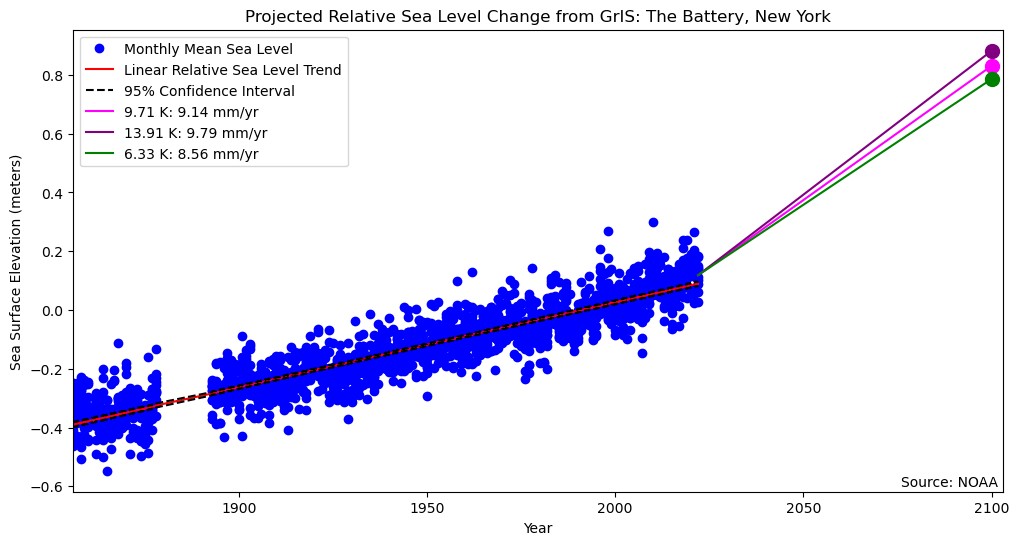

In [36]:
# Plot monthly mean sea level by year with projected relative sea level change from GrIS for The Battery, New York
fig, ax = plt.subplots()

df_yr.Monthly_MSL.plot(color='blue', style='o', ax=ax, label='Monthly Mean Sea Level');
df_yr.Linear_Trend.plot(color='red', ax=ax, label='Linear Relative Sea Level Trend');
df_yr.High_Conf.plot(color='black', style='--', ax=ax, label='95% Confidence Interval');
df_yr.Low_Conf.plot(color='black', style='--', ax=ax, label='');

ax.set_ylabel('Sea Surface Elevation (meters)')
ax.set_title('Relative Sea Level Trend: The Batter, New York')
ax.margins(x=0)
ax.legend(loc=2);

ax.plot(proj_yrs, proj_1_slc, color='magenta', label='9.71 K: 9.14 mm/yr')
ax.plot(proj_yrs, proj_2_slc, color='purple', label='13.91 K: 9.79 mm/yr')
ax.plot(proj_yrs, proj_3_slc, color='green', label='6.33 K: 8.56 mm/yr')

ax.plot(proj_yrs[78], proj_1_slc[78], 'o', markersize=10, color='magenta', label='')
ax.plot(proj_yrs[78], proj_2_slc[78], 'o', markersize=10, color='purple', label='')
ax.plot(proj_yrs[78], proj_3_slc[78], 'o', markersize=10, color='green', label='')

plt.text(2076,-0.6,'Source: NOAA')

ax.set_ylabel('Sea Surface Elevation (meters)')
ax.set_title('Projected Relative Sea Level Change from GrIS: The Battery, New York')
ax.set_xlim(1856, 2103)
ax.margins(x=0)
ax.legend(loc=2);

## 14) Save figure of monthly mean sea level by year for The Battery, New York with projected relative sea level change from GrIS

In [37]:
# Save figure
fig.savefig("SLC_2100_Battery-NY.png", bbox_inches='tight', dpi=600)

## 15) Plot projected relative sea level change from GrIS for The Battery, New York

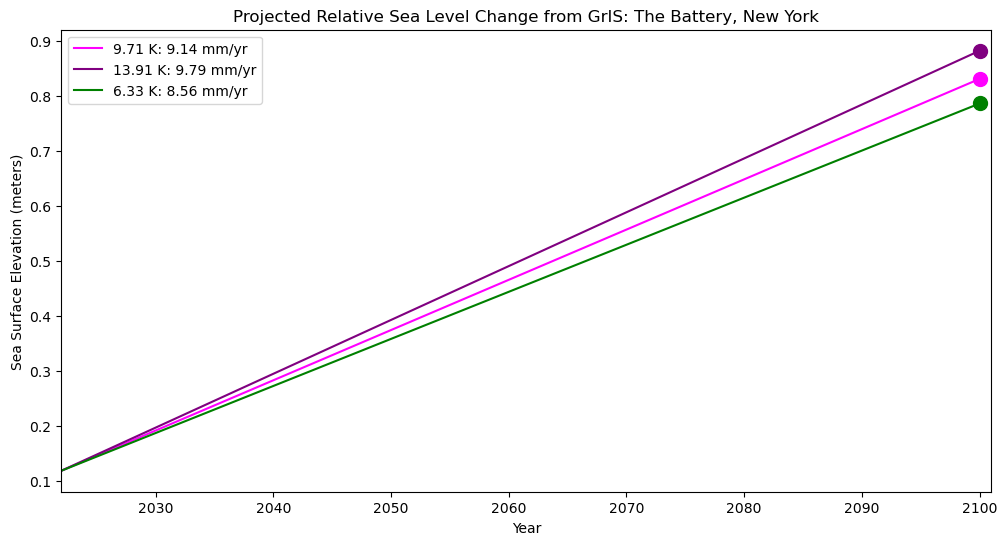

In [38]:
# Plot projected relative sea level change from GrIS for The Battery, New York
fig, ax = plt.subplots()

ax.plot(proj_yrs, proj_1_slc, color='magenta', label='9.71 K: 9.14 mm/yr')
ax.plot(proj_yrs, proj_2_slc, color='purple', label='13.91 K: 9.79 mm/yr')
ax.plot(proj_yrs, proj_3_slc, color='green', label='6.33 K: 8.56 mm/yr')

ax.plot(proj_yrs[78], proj_1_slc[78], 'o', markersize=10, color='magenta', label='')
ax.plot(proj_yrs[78], proj_2_slc[78], 'o', markersize=10, color='purple', label='')
ax.plot(proj_yrs[78], proj_3_slc[78], 'o', markersize=10, color='green', label='')

ax.set_ylabel('Sea Surface Elevation (meters)')
ax.set_xlabel('Year')
ax.set_title('Projected Relative Sea Level Change from GrIS: The Battery, New York')
ax.set_xlim(2022, 2101)
ax.margins(x=0)
ax.legend(loc=2);

## 16) Save figure of projected relative sea level change from GrIS for The Battery, New York

In [39]:
# Save figure
fig.savefig("SLC_2022-2100_Battery-NY.png", bbox_inches='tight', dpi=600)